In [1]:
import pandas as pd


# Load one raw file first 
df = pd.read_csv(
    "../../data/raw/Bakerloo.csv"
)

print(df.shape)
df.head()


(577, 28)


,$type,id,operationType,vehicleId,naptanId,stationName,lineId,lineName,platformName,direction,...,timeToLive,modeName,timing.$type,timing.countdownServerAdjustment,timing.source,timing.insert,timing.read,timing.sent,timing.received,api_fetch_time
0,"Tfl.Api.Presentation.Entities.Prediction, Tfl....",727190231,1,243,940GZZLURGP,Regent's Park Underground Station,bakerloo,Bakerloo,Northbound - Platform 1,outbound,...,2025-11-27T11:37:09Z,tube,Tfl.Api.Presentation.Entities.PredictionTiming...,00:00:00,0001-01-01T00:00:00,0001-01-01T00:00:00,2025-11-27T11:26:02.032Z,2025-11-27T11:25:53Z,0001-01-01T00:00:00,2025-11-27 11:26:26
1,"Tfl.Api.Presentation.Entities.Prediction, Tfl....",570679767,1,245,940GZZLUWKA,Warwick Avenue Underground Station,bakerloo,Bakerloo,Northbound - Platform 1,outbound,...,2025-11-27T11:34:10Z,tube,Tfl.Api.Presentation.Entities.PredictionTiming...,00:00:00,0001-01-01T00:00:00,0001-01-01T00:00:00,2025-11-27T11:26:02.543Z,2025-11-27T11:25:53Z,0001-01-01T00:00:00,2025-11-27 11:26:26
2,"Tfl.Api.Presentation.Entities.Prediction, Tfl....",1130588293,1,243,940GZZLUQPS,Queen's Park Underground Station,bakerloo,Bakerloo,Northbound - Platform 3,NaN,...,2025-11-27T11:53:09Z,tube,Tfl.Api.Presentation.Entities.PredictionTiming...,00:00:00,0001-01-01T00:00:00,0001-01-01T00:00:00,2025-11-27T11:26:01.73Z,2025-11-27T11:25:53Z,0001-01-01T00:00:00,2025-11-27 11:26:26
3,"Tfl.Api.Presentation.Entities.Prediction, Tfl....",-767828621,1,231,940GZZLUEAC,Elephant & Castle Underground Station,bakerloo,Bakerloo,Northbound - Platform 3,NaN,...,2025-11-27T11:46:10Z,tube,Tfl.Api.Presentation.Entities.PredictionTiming...,00:00:00,0001-01-01T00:00:00,0001-01-01T00:00:00,2025-11-27T11:25:59.428Z,2025-11-27T11:25:53Z,0001-01-01T00:00:00,2025-11-27 11:26:26
4,"Tfl.Api.Presentation.Entities.Prediction, Tfl....",-1576496683,1,237,940GZZLUEAC,Elephant & Castle Underground Station,bakerloo,Bakerloo,Northbound - Platform 4,NaN,...,2025-11-27T11:44:10Z,tube,Tfl.Api.Presentation.Entities.PredictionTiming...,00:00:00,0001-01-01T00:00:00,0001-01-01T00:00:00,2025-11-27T11:25:59.428Z,2025-11-27T11:25:53Z,0001-01-01T00:00:00,2025-11-27 11:26:26


In [2]:
#Read all 6 CSV files
FILES = {
    "Bakerloo": "../../data/raw/Bakerloo.csv",
    "Central": "../../data/raw/Central.csv",
    "Northern": "../../data/raw/Northern.csv",
    "Piccadilly": "../../data/raw/Piccadilly.csv",
    "Victoria": "../../data/raw/Victoria.csv",
    "Metropolitan": "../../data/raw/Metropolitan.csv"
}

dataframes = {}

for line, path in FILES.items():
    df = pd.read_csv(path)
    dataframes[line] = df

print("Raw datasets loaded")



Raw datasets loaded


In [3]:
print("COLUMN COUNT CHECK")

for line, df in dataframes.items():
    print(f"{line}: {len(df.columns)} columns")


COLUMN COUNT CHECK
Bakerloo: 28 columns
Central: 28 columns
Northern: 28 columns
Piccadilly: 28 columns
Victoria: 28 columns
Metropolitan: 28 columns


In [4]:
#count check 

print("ROW COUNT CHECK")
for line, df in dataframes.items():
    print(f"{line}: {df.shape[0]} rows")


ROW COUNT CHECK
Bakerloo: 577 rows
Central: 1547 rows
Northern: 2065 rows
Piccadilly: 952 rows
Victoria: 549 rows
Metropolitan: 362 rows


In [5]:
print("ALL COLUMN NAMES PER FILE")

for line, df in dataframes.items():
    print(f"\n {line} ({len(df.columns)} columns):")
    for col in df.columns:
        print(col)


ALL COLUMN NAMES PER FILE

 Bakerloo (28 columns):
$type
id
operationType
vehicleId
naptanId
stationName
lineId
lineName
platformName
direction
bearing
destinationNaptanId
destinationName
timestamp
timeToStation
currentLocation
towards
expectedArrival
timeToLive
modeName
timing.$type
timing.countdownServerAdjustment
timing.source
timing.insert
timing.read
timing.sent
timing.received
api_fetch_time

 Central (28 columns):
$type
id
operationType
vehicleId
naptanId
stationName
lineId
lineName
platformName
direction
bearing
destinationNaptanId
destinationName
timestamp
timeToStation
currentLocation
towards
expectedArrival
timeToLive
modeName
timing.$type
timing.countdownServerAdjustment
timing.source
timing.insert
timing.read
timing.sent
timing.received
api_fetch_time

 Northern (28 columns):
$type
id
operationType
vehicleId
naptanId
stationName
lineId
lineName
platformName
direction
bearing
destinationNaptanId
destinationName
timestamp
timeToStation
currentLocation
towards
expectedArrival

In [6]:
all_columns = set()

for df in dataframes.values():
    all_columns.update(df.columns)

print("UNIQUE COLUMNS ACROSS ALL FILES")
for col in sorted(all_columns):
    print(col)


UNIQUE COLUMNS ACROSS ALL FILES
$type
api_fetch_time
bearing
currentLocation
destinationName
destinationNaptanId
direction
expectedArrival
id
lineId
lineName
modeName
naptanId
operationType
platformName
stationName
timeToLive
timeToStation
timestamp
timing.$type
timing.countdownServerAdjustment
timing.insert
timing.read
timing.received
timing.sent
timing.source
towards
vehicleId


In [7]:
print("SHAPE OF ALL DATASETS (rows, columns)")

for line, df in dataframes.items():
    print(f"{line}: {df.shape}")


SHAPE OF ALL DATASETS (rows, columns)
Bakerloo: (577, 28)
Central: (1547, 28)
Northern: (2065, 28)
Piccadilly: (952, 28)
Victoria: (549, 28)
Metropolitan: (362, 28)


In [8]:
# check null values 

print("NULL VALUE ANALYSIS")

for line, df in dataframes.items():
    print(f"\n {line}")
    print("Total null values:", df.isnull().sum().sum())



NULL VALUE ANALYSIS

 Bakerloo
Total null values: 651

 Central
Total null values: 1619

 Northern
Total null values: 2175

 Piccadilly
Total null values: 1017

 Victoria
Total null values: 610

 Metropolitan
Total null values: 625


In [9]:
#perdataset per coloumn - null value count

print("NULL VALUES PER COLUMN (PER DATASET)\n")

for line, df in dataframes.items():
    print(f"DATASET: {line}")
    
    null_counts = df.isnull().sum()
    
    # Print only columns that actually have nulls
    null_counts = null_counts[null_counts > 0]
    
    if null_counts.empty:
        print("No null values found")
    else:
        for col, count in null_counts.items():
            print(f"{col} : {count}")
    
    print("-" * 50)


NULL VALUES PER COLUMN (PER DATASET)

DATASET: Bakerloo
direction : 74
bearing : 577
--------------------------------------------------
DATASET: Central
direction : 72
bearing : 1547
--------------------------------------------------
DATASET: Northern
direction : 104
bearing : 2065
currentLocation : 6
--------------------------------------------------
DATASET: Piccadilly
direction : 32
bearing : 952
destinationNaptanId : 10
destinationName : 10
currentLocation : 13
--------------------------------------------------
DATASET: Victoria
bearing : 549
direction : 61
--------------------------------------------------
DATASET: Metropolitan
bearing : 362
destinationNaptanId : 76
destinationName : 76
direction : 111
--------------------------------------------------


In [10]:
# check duplicates per dataset

print("FULL DUPLICATE CHECK (PER DATASET)")

for line, df in dataframes.items():
    full_dup_count = df.duplicated().sum()
    print(f"{line}: {full_dup_count} full duplicate rows")


FULL DUPLICATE CHECK (PER DATASET)
Bakerloo: 0 full duplicate rows
Central: 0 full duplicate rows
Northern: 0 full duplicate rows
Piccadilly: 0 full duplicate rows
Victoria: 0 full duplicate rows
Metropolitan: 0 full duplicate rows


In [11]:
# check logical duplicates
#Logical duplicate = same train, same station, same arrival time

print("LOGICAL DUPLICATION (PER DATASET)")

for line, df in dataframes.items():
    affected_rows = df[
        df.duplicated(
            subset=["vehicleId", "stationName", "expectedArrival"],
            keep=False
        )
    ].shape[0]

    print(f"{line}: {affected_rows} rows affected")


LOGICAL DUPLICATION (PER DATASET)
Bakerloo: 6 rows affected
Central: 6 rows affected
Northern: 58 rows affected
Piccadilly: 12 rows affected
Victoria: 8 rows affected
Metropolitan: 0 rows affected


In [12]:
# view logical duplicates 

print("ACTUAL LOGICAL DUPLICATE RECORDS (ALL DATASETS)")

for line, df in dataframes.items():
    dup_df = df[
        df.duplicated(
            subset=["vehicleId", "stationName", "expectedArrival"],
            keep=False
        )
    ][["vehicleId", "stationName", "expectedArrival", "timestamp"]]

    print(f"DATASET: {line}")

    if dup_df.empty:
        print("No logical duplicates found")
    else:
        display(
            dup_df.sort_values(
                ["vehicleId", "stationName", "expectedArrival", "timestamp"]
            ).head(10)
        )



ACTUAL LOGICAL DUPLICATE RECORDS (ALL DATASETS)
DATASET: Bakerloo


,vehicleId,stationName,expectedArrival,timestamp
363,234,Baker Street Underground Station,2025-11-27T13:03:16Z,2025-11-27T12:49:06.5183046Z
516,234,Baker Street Underground Station,2025-11-27T13:03:16Z,2025-11-27T12:51:11.4694955Z
358,234,Piccadilly Circus Underground Station,2025-11-27T12:57:15Z,2025-11-27T12:49:06.5183046Z
463,234,Piccadilly Circus Underground Station,2025-11-27T12:57:15Z,2025-11-27T12:51:11.4694955Z
362,234,Queen's Park Underground Station,2025-11-27T13:17:15Z,2025-11-27T12:49:06.5183046Z
498,234,Queen's Park Underground Station,2025-11-27T13:17:15Z,2025-11-27T12:51:11.4694955Z


DATASET: Central


,vehicleId,stationName,expectedArrival,timestamp
609,5,Buckhurst Hill Underground Station,2025-11-27T12:51:19Z,2025-11-27T12:45:59.5977346Z
1114,5,Buckhurst Hill Underground Station,2025-11-27T12:51:19Z,2025-11-27T12:51:11.3880589Z
988,44,East Acton Underground Station,2025-11-27T13:17:16Z,2025-11-27T12:47:02.4877555Z
1284,44,East Acton Underground Station,2025-11-27T13:17:16Z,2025-11-27T12:51:11.3880589Z
1032,56,Gants Hill Underground Station,2025-11-27T13:19:15Z,2025-11-27T12:50:09.4929131Z
1440,56,Gants Hill Underground Station,2025-11-27T13:19:15Z,2025-11-27T12:51:11.3880589Z


DATASET: Northern


,vehicleId,stationName,expectedArrival,timestamp
1245,1,Hendon Central Underground Station,2025-11-27T12:53:12Z,2025-11-27T12:45:59.5104648Z
1666,1,Hendon Central Underground Station,2025-11-27T12:53:12Z,2025-11-27T12:51:11.0355766Z
1173,12,Leicester Square Underground Station,2025-11-27T13:11:12Z,2025-11-27T12:45:59.5104648Z
1786,12,Leicester Square Underground Station,2025-11-27T13:11:12Z,2025-11-27T12:51:11.0355766Z
908,13,Leicester Square Underground Station,2025-11-27T13:08:12Z,2025-11-27T12:45:59.5104648Z
1505,13,Leicester Square Underground Station,2025-11-27T13:08:12Z,2025-11-27T12:51:11.0355766Z
1174,25,Golders Green Underground Station,2025-11-27T13:13:12Z,2025-11-27T12:45:59.5104648Z
1911,25,Golders Green Underground Station,2025-11-27T13:13:12Z,2025-11-27T12:51:11.0355766Z
1264,40,East Finchley Underground Station,2025-11-27T12:58:12Z,2025-11-27T12:45:59.5104648Z
1850,40,East Finchley Underground Station,2025-11-27T12:58:12Z,2025-11-27T12:51:11.0355766Z


DATASET: Piccadilly


,vehicleId,stationName,expectedArrival,timestamp
427,230,Park Royal Underground Station,2025-11-27T13:10:12Z,2025-11-27T12:45:58.3134238Z
669,230,Park Royal Underground Station,2025-11-27T13:10:12Z,2025-11-27T12:51:09.9955825Z
437,241,Hatton Cross Underground Station,2025-11-27T13:01:12Z,2025-11-27T12:45:58.3134238Z
860,241,Hatton Cross Underground Station,2025-11-27T13:01:12Z,2025-11-27T12:51:09.9955825Z
633,305,Oakwood Underground Station,2025-11-27T13:16:11Z,2025-11-27T12:48:03.9735233Z
904,305,Oakwood Underground Station,2025-11-27T13:16:11Z,2025-11-27T12:51:09.9955825Z
599,305,Southgate Underground Station,2025-11-27T13:13:12Z,2025-11-27T12:45:58.3134238Z
703,305,Southgate Underground Station,2025-11-27T13:13:12Z,2025-11-27T12:51:09.9955825Z
495,317,Turnham Green Underground Station,2025-11-27T12:54:12Z,2025-11-27T12:45:58.3134238Z
684,317,Turnham Green Underground Station,2025-11-27T12:54:12Z,2025-11-27T12:51:09.9955825Z


DATASET: Victoria


,vehicleId,stationName,expectedArrival,timestamp
331,233,Green Park Underground Station,2025-11-27T13:09:16Z,2025-11-27T12:49:06.8997238Z
518,233,Green Park Underground Station,2025-11-27T13:09:16Z,2025-11-27T12:51:13.7918458Z
329,233,King's Cross St. Pancras Underground Station,2025-11-27T13:02:16Z,2025-11-27T12:49:06.8997238Z
386,233,King's Cross St. Pancras Underground Station,2025-11-27T13:02:16Z,2025-11-27T12:51:13.7918458Z
336,233,Oxford Circus Underground Station,2025-11-27T13:07:17Z,2025-11-27T12:49:06.8997238Z
541,233,Oxford Circus Underground Station,2025-11-27T13:07:17Z,2025-11-27T12:51:13.7918458Z
340,233,Victoria Underground Station,2025-11-27T13:12:16Z,2025-11-27T12:50:10.5109239Z
375,233,Victoria Underground Station,2025-11-27T13:12:16Z,2025-11-27T12:51:13.7918458Z


DATASET: Metropolitan
No logical duplicates found


In [13]:
print("LOGICAL DUPLICATION PERCENTAGE (PER DATASET)")

for line, df in dataframes.items():
    total_rows = df.shape[0]

    affected_rows = df[
        df.duplicated(
            subset=["vehicleId", "stationName", "expectedArrival"],
            keep=False
        )
    ].shape[0]

    percentage = round((affected_rows / total_rows) * 100, 2)

    print(
        f"{line}: {affected_rows} / {total_rows} rows "
        f"{percentage}% affected by logical duplication"
    )


LOGICAL DUPLICATION PERCENTAGE (PER DATASET)
Bakerloo: 6 / 577 rows 1.04% affected by logical duplication
Central: 6 / 1547 rows 0.39% affected by logical duplication
Northern: 58 / 2065 rows 2.81% affected by logical duplication
Piccadilly: 12 / 952 rows 1.26% affected by logical duplication
Victoria: 8 / 549 rows 1.46% affected by logical duplication
Metropolitan: 0 / 362 rows 0.0% affected by logical duplication


In [14]:
import matplotlib.pyplot as plt
summary = []

for line, df in dataframes.items():
    total = len(df)
    affected = df[
        df.duplicated(
            subset=["vehicleId", "stationName", "expectedArrival"],
            keep=False
        )
    ].shape[0]

    summary.append({
        "Dataset": line,
        "Total_Rows": total,
        "Affected_Rows": affected
    })

summary_df = pd.DataFrame(summary)




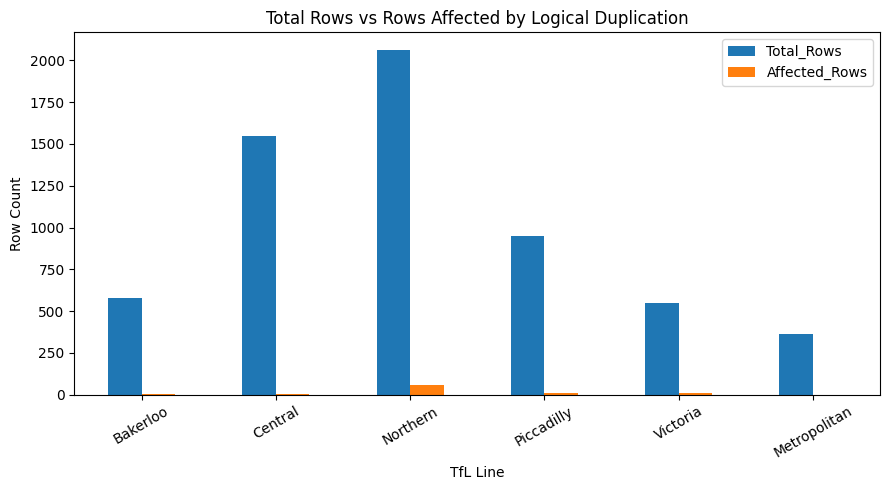

In [15]:
summary_df.set_index("Dataset").plot(
    kind="bar",
    figsize=(9, 5)
)

plt.title("Total Rows vs Rows Affected by Logical Duplication")
plt.ylabel("Row Count")
plt.xlabel("TfL Line")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [22]:
summary_df["Duplication_Pct"] = round((summary_df["Affected_Rows"] / summary_df["Total_Rows"]) * 100, 2)


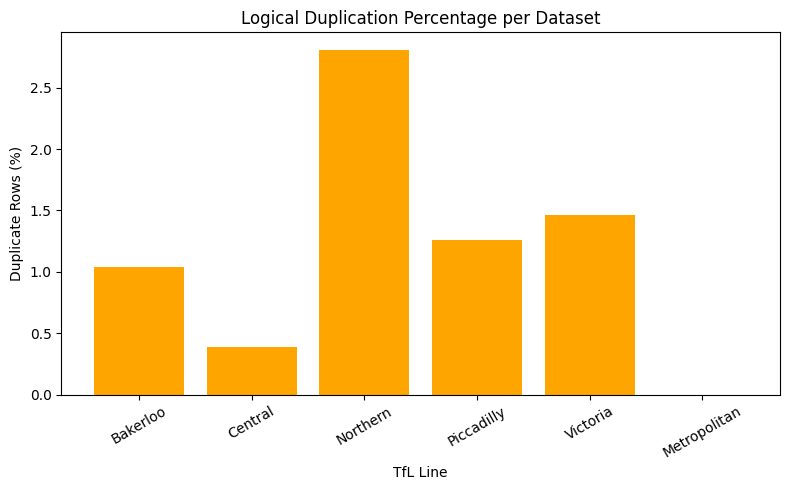

In [23]:
plt.figure(figsize=(8,5))
plt.bar(summary_df["Dataset"], summary_df["Duplication_Pct"], color='orange')

plt.title("Logical Duplication Percentage per Dataset")
plt.xlabel("TfL Line")
plt.ylabel("Duplicate Rows (%)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### Summary

- No exact duplicate rows found across datasets
- Logical duplicates detected due to frequent TfL Estimated Time of Arrival(ETA) Same train,Same station,Same arrival event, Different update timestampsrefresh cycles(as new data updates the percentage of duplicates are decreasing)
- Null values observed in optional columns such as bearing, direction, and currentLocation
- Critical columns (vehicleId, stationName, expectedArrival) show good completeness
- Dataset is suitable for further Bronze–Silver processing
